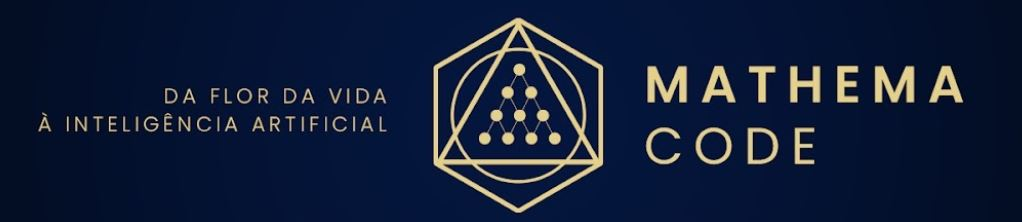

<font size=7>Aula 5 - Escala Intervalar</font>

In [1]:
# importar o pandas
import pandas as pd
pd.options.display.max_columns = None

In [2]:
# importar matplot lib e definir a impressão de gráficos para inline
import matplotlib.pyplot as plt
%matplotlib inline

# Escala Intervalar

1. Mensuração do intervalo
  - Quanto um valor é menor ou maior que outro

2. <span style="background-color:#FF0000">Zero é flutuante (convencional)</span>

  
3. Operações:
 - iguais ou diferentes
 - maior ou menor
 - soma e substração

4. Diferenças podem ser medidas


5. Medições

    Praticamente todas as medições são aplicadas <font color='grey'>(menos as que necessitam de um verdadeiro zero)</font>
    
    1. Média
    2. Desvio Padrão
    3. Correlação momento-produto
    4. Testes t
    5. ANOVA
    6. Regressão
    7. Análise Fatorial
    

6. Exemplos
   1. Temperatura (Celsius, Fahrenheit)  
   2. Calendário ( Gregoriano, Chinês, Juliano, Judaico)
   3. Quociente de inteligência (QI) (não há zero!)
   

6. Gráficos
    1. Linhas
    2. Histograma
    3. Boxplot
    4. Dispersão

![cerveja gif](https://media0.giphy.com/media/ixCowc31ZeKuIHuhFe/giphy.gif?cid=ecf05e47bp25w8qnpr6a6prfpjx34mg9xc3dchc8enkzagec&rid=giphy.gif&ct=g)


[Link do dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)

In [4]:
# ler o dataframe de cerveja "Consumo_cerveja.csv"
# Especificar:
# - separador de decimal = ','
# - separador de milhar = '.'
# - colunas de datas = 'Data'
cerveja = pd.read_csv(
    #'datasets/Consumo_cerveja.csv',
    r"E:\Users\LCFC\Documents\Consumo_cerveja.csv",
    decimal=',',
    thousands='.'
    )

In [5]:
# Mostrar resumo de informações 
cerveja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


In [7]:
# Mostrar amostra de 10 linhas com "sample"
cerveja.sample(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2015-01-26,22.40,18.9,28.7,20.8,0.0,21520.0
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,2015-08-17,21.58,15.3,28.0,0.0,0.0,22541.0
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2015-04-12,19.92,16.8,25.7,0.0,1.0,25070.0


In [8]:
# Converte coluna 'Data' para o dtype datetime
cerveja['Data'] = pd.to_datetime(cerveja['Data'], format='%Y-%m-%d')

[Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [9]:
# Confirmar a mudança do dtype para datetime
cerveja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.6 KB


In [11]:
# Mostrar quantidade de nulos por colunas
cerveja.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [12]:
# Mostrar percentual de nulos por coluna
(cerveja.isna().sum() / cerveja.shape[0]).round(2)

Data                           0.61
Temperatura Media (C)          0.61
Temperatura Minima (C)         0.61
Temperatura Maxima (C)         0.61
Precipitacao (mm)              0.61
Final de Semana                0.61
Consumo de cerveja (litros)    0.61
dtype: float64

In [15]:
cerveja.notna().sum()

Data                           365
Temperatura Media (C)          365
Temperatura Minima (C)         365
Temperatura Maxima (C)         365
Precipitacao (mm)              365
Final de Semana                365
Consumo de cerveja (litros)    365
dtype: int64

In [18]:
cerveja.notna() + 1

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
936,1,1,1,1,1,1,1
937,1,1,1,1,1,1,1
938,1,1,1,1,1,1,1
939,1,1,1,1,1,1,1


In [21]:
# Remover linhas com valores nulos
x = cerveja.dropna(inplace=True)
x

In [22]:
print(x)

None


In [23]:
# Confirmar remoção de nulos
(cerveja.isna().sum() / cerveja.shape[0]).round(2)

Data                           0.0
Temperatura Media (C)          0.0
Temperatura Minima (C)         0.0
Temperatura Maxima (C)         0.0
Precipitacao (mm)              0.0
Final de Semana                0.0
Consumo de cerveja (litros)    0.0
dtype: float64

## Criação de colunas a partir de datas

In [24]:
# métodos e atributos de data
dir(cerveja['Data'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [25]:
# criar coluna de dia da semana
cerveja['Dia da Semana Num'] = cerveja['Data'].dt.weekday
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0,3
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0,4
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0,5
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0,6
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0,0


[day_of_week](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html) documentação

In [26]:
# criar coluna de dia da semana
cerveja['Data'].dt.day_of_week

0      3
1      4
2      5
3      6
4      0
      ..
360    6
361    0
362    1
363    2
364    3
Name: Data, Length: 365, dtype: int64

In [44]:
# também é possível obter os dias da semana em inglês
cerveja['Dia da Semana Nome'] = cerveja['Data'].dt.day_name()
cerveja[['Data', 'Dia da Semana Num', 'Dia da Semana Nome']].head(10)

,Data,Dia da Semana Num,Dia da Semana Nome(en)
0,2015-01-01,3,Thursday
1,2015-01-02,4,Friday
2,2015-01-03,5,Saturday
3,2015-01-04,6,Sunday
4,2015-01-05,0,Monday
5,2015-01-06,1,Tuesday
6,2015-01-07,2,Wednesday
7,2015-01-08,3,Thursday
8,2015-01-09,4,Friday
9,2015-01-10,5,Saturday


In [ ]:
mapa = {0: 'segunda ...'}
        

In [28]:
# criar coluna com o mês
cerveja['Mes'] = cerveja['Data'].dt.month
cerveja.sample(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes
226,2015-08-15,21.44,15.6,27.8,0.0,1.0,29621.0,5,Saturday,8
98,2015-04-09,19.40,15.9,25.6,0.0,0.0,20298.0,3,Thursday,4
318,2015-11-15,23.06,19.8,29.7,8.0,1.0,29386.0,6,Sunday,11
31,2015-02-01,24.16,20.6,28.0,0.0,1.0,32057.0,6,Sunday,2
193,2015-07-13,22.06,16.7,28.7,0.0,0.0,25640.0,0,Monday,7


## Operações com datas

In [29]:
# obtendo a data de agora
agora = pd.to_datetime('today')
agora

Timestamp('2021-11-06 10:07:32.132111')

In [31]:
# calcular tempo decorrido em **dias** entre datas
cerveja['Dias'] = (agora - cerveja['Data']).dt.days
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0,3,Thursday,1,2501
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0,4,Friday,1,2500
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0,5,Saturday,1,2499
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0,6,Sunday,1,2498
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0,0,Monday,1,2497


In [37]:
data_inicial = pd.to_datetime('2021-11-01', format='%Y-%m-%d')
data_inicial

Timestamp('2021-11-01 00:00:00')

In [39]:
data_inicial.month

11

In [33]:
# calcular tempo decorrido em **anos** entre datas
cerveja['Anos'] = (agora - cerveja['Data']).dt.days // 365.25
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias,Anos
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0,3,Thursday,1,2501,6.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0,4,Friday,1,2500,6.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0,5,Saturday,1,2499,6.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0,6,Sunday,1,2498,6.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0,0,Monday,1,2497,6.0


In [34]:
# Criar filtro para mostrar apenas datas do mês atual e de 3 dias antes da data de hoje
agora = pd.to_datetime('today')
filtro = (cerveja['Data'].dt.month == agora.month) & (cerveja['Data'].dt.day >= (agora.day - 3))
filtro.head()

0    False
1    False
2    False
3    False
4    False
Name: Data, dtype: bool

In [35]:
# Mostra filtro aplicado
cerveja[filtro]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias,Anos
306,2015-11-03,21.86,19.5,25.6,3.4,0.0,22741.0,1,Tuesday,11,2195,6.0
307,2015-11-04,21.52,18.6,27.4,6.8,0.0,21479.0,2,Wednesday,11,2194,6.0
308,2015-11-05,21.80,18.2,24.8,39.3,0.0,23134.0,3,Thursday,11,2193,6.0
309,2015-11-06,19.76,18.0,22.8,0.0,0.0,20575.0,4,Friday,11,2192,6.0
310,2015-11-07,18.30,16.8,20.0,1.2,1.0,24330.0,5,Saturday,11,2191,5.0
311,2015-11-08,20.24,17.4,23.9,0.6,1.0,28610.0,6,Sunday,11,2190,5.0
312,2015-11-09,22.98,18.7,29.5,4.4,0.0,28456.0,0,Monday,11,2189,5.0
313,2015-11-10,23.72,19.4,31.8,10.4,0.0,27964.0,1,Tuesday,11,2188,5.0
314,2015-11-11,26.20,19.8,32.7,0.0,0.0,29569.0,2,Wednesday,11,2187,5.0
315,2015-11-12,23.78,20.8,31.8,0.0,0.0,29267.0,3,Thursday,11,2186,5.0


## Gráficos

### Gráfico de linhas

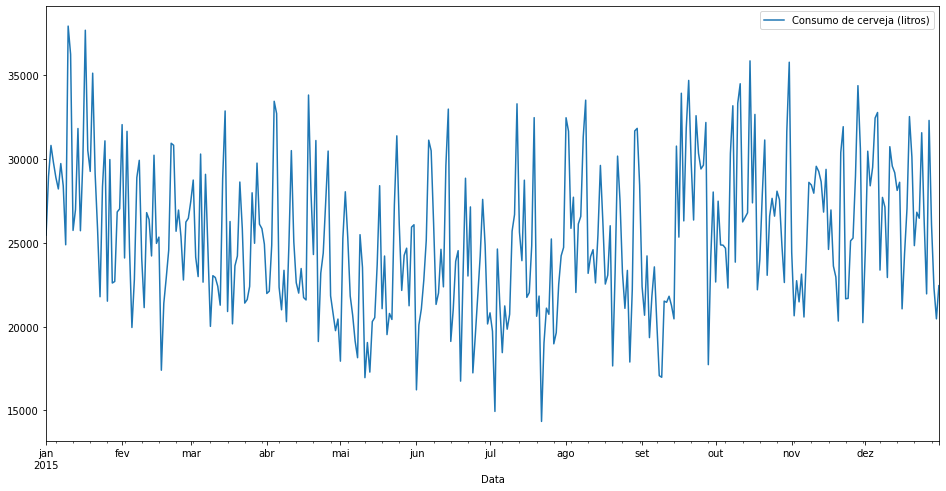

In [51]:
# plotar gráfico de linhas do consumo de cerveja ('Consumo de cerveja (litros)')
# ao longo de tempo (coluna "Data")
cerveja.plot(x='Data', y='Consumo de cerveja (litros)', figsize=(16,8));

In [52]:
# criar coluna a com semana do ano
cerveja['Semana'] = cerveja['Data'].dt.week
cerveja.sample(5)

C:\Users\luizf\AppData\Local\Temp/ipykernel_19876/486543702.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  cerveja['Semana'] = cerveja['Data'].dt.week


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias,Anos,Dia da Semana Nome(en),Semana
116,2015-04-27,19.82,17.5,24.9,0.0,0.0,21838.0,0,Monday,4,2385,6.0,Monday,18
82,2015-03-24,20.98,17.4,26.3,0.0,0.0,21617.0,1,Tuesday,3,2419,6.0,Tuesday,13
195,2015-07-15,20.18,17.2,27.6,0.0,0.0,28742.0,2,Wednesday,7,2306,6.0,Wednesday,29
275,2015-10-03,20.28,16.1,25.0,25.0,1.0,24876.0,5,Saturday,10,2226,6.0,Saturday,40
196,2015-07-16,19.88,16.2,25.8,0.0,0.0,21748.0,3,Thursday,7,2305,6.0,Thursday,29


In [53]:
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias,Anos,Dia da Semana Nome(en),Semana
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0,3,Thursday,1,2501,6.0,Thursday,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0,4,Friday,1,2500,6.0,Friday,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0,5,Saturday,1,2499,6.0,Saturday,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0,6,Sunday,1,2498,6.0,Sunday,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0,0,Monday,1,2497,6.0,Monday,2


In [54]:
cerveja.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias,Anos,Dia da Semana Nome(en),Semana
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32307.0,6,Sunday,12,2141,5.0,Sunday,52
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26095.0,0,Monday,12,2140,5.0,Monday,53
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22309.0,1,Tuesday,12,2139,5.0,Tuesday,53
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20467.0,2,Wednesday,12,2138,5.0,Wednesday,53
364,2015-12-31,24.76,20.2,29.0,0.0,0.0,22446.0,3,Thursday,12,2137,5.0,Thursday,53


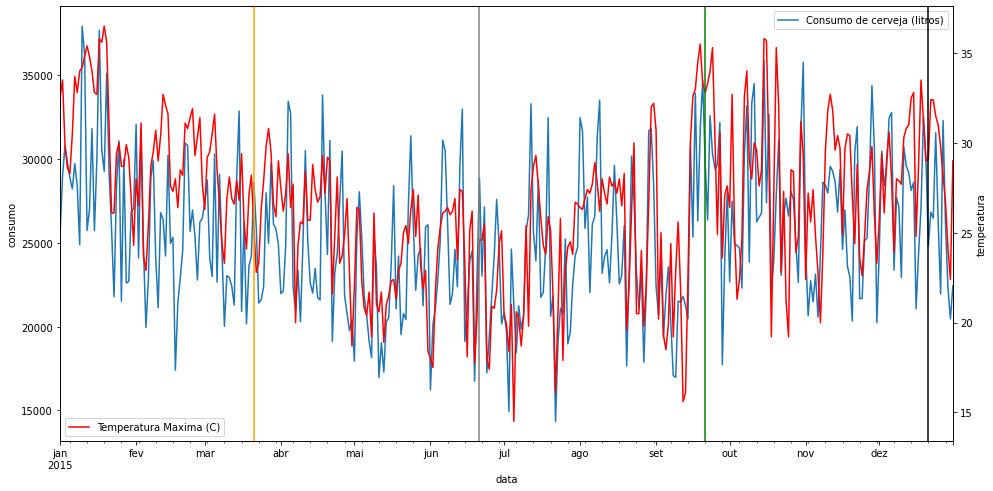

In [65]:
# plotar gráfico de linhas do consumo de cerveja ('Consumo de cerveja (litros)')
# e da temperatura 'Temperatura Maxima (C)'
ax1 = cerveja.plot(x='Data', y='Consumo de cerveja (litros)', figsize=(16,8), ylabel='consumo', xlabel='data'); # axe
#ax1.set_xlabel("data")
#ax1.set_ylabel("consumo")
ax2 = ax1.twinx()
cerveja.plot(x='Data', y='Temperatura Maxima (C)', ax=ax2, color='r', ylabel='temperatura');
plt.axvline('21-3-2015', color='orange')
plt.axvline('21-6-2015', color='gray')
plt.axvline('21-9-2015', color='g')
plt.axvline('21-12-2015', color='k');

In [60]:
cerveja[['Consumo de cerveja (litros)', 'Temperatura Maxima (C)']].corr()

,Consumo de cerveja (litros),Temperatura Maxima (C)
Consumo de cerveja (litros),1.000000,0.642672
Temperatura Maxima (C),0.642672,1.000000


In [66]:
# suaviza as linhas de consumo e temperatura criando 
# colunas de média móvel de 7 valores da temperatura e do 
# consumo
cerveja['Consumo(litros)Mm7'] = cerveja['Consumo de cerveja (litros)'].rolling(7).mean()
cerveja['TMax(C)Mm7'] = cerveja['Temperatura Maxima (C)'].rolling(7).mean()
cerveja.head(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana Num,Dia da Semana Nome,Mes,Dias,Anos,Dia da Semana Nome(en),Semana,Consumo(litros)Mm7,TMax(C)Mm7
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0,3,Thursday,1,2501,6.0,Thursday,1,NaN,NaN
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0,4,Friday,1,2500,6.0,Friday,1,NaN,NaN
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0,5,Saturday,1,2499,6.0,Saturday,1,NaN,NaN
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0,6,Sunday,1,2498,6.0,Sunday,1,NaN,NaN
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0,0,Monday,1,2497,6.0,Monday,2,NaN,NaN
5,2015-01-06,23.78,20.1,30.5,12.2,0.0,28218.0,1,Tuesday,1,2496,6.0,Tuesday,2,NaN,NaN
6,2015-01-07,24.00,19.5,33.7,0.0,0.0,29732.0,2,Wednesday,1,2495,6.0,Wednesday,2,28842.285714,31.000000
7,2015-01-08,24.90,19.5,32.8,48.6,0.0,28397.0,3,Thursday,1,2494,6.0,Thursday,2,29261.714286,31.042857
8,2015-01-09,28.20,21.9,34.0,4.4,0.0,24886.0,4,Friday,1,2493,6.0,Friday,2,28678.000000,31.114286
9,2015-01-10,26.76,22.1,34.2,0.0,1.0,37937.0,5,Saturday,1,2492,6.0,Saturday,2,29695.571429,31.728571


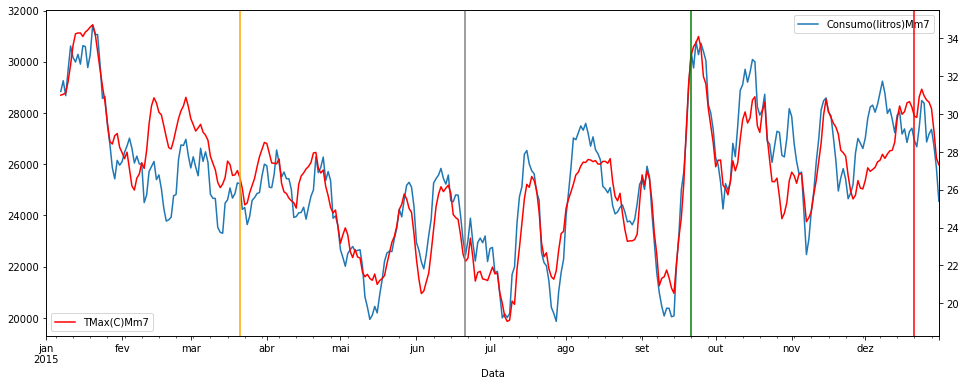

In [67]:
# plotar gráfico de linhas da média movel do consumo de cerveja ('Consumo(litros)Mm7')
# e da temperatura 'TMax(C)Mm7'
ax1 = cerveja.plot(x='Data', y='Consumo(litros)Mm7', figsize=(16,6))
ax2 = ax1.twinx()
cerveja.plot(x='Data', y='TMax(C)Mm7', color='r', ax=ax2);
plt.axvline('21-3-2015', color='orange')
plt.axvline('21-6-2015', color='gray')
plt.axvline('21-9-2015', color='g')
plt.axvline('21-12-2015', color='r');

[Jogo para adivinhar a correlação](http://guessthecorrelation.com/)

In [68]:
cerveja[['Consumo(litros)Mm7', 'TMax(C)Mm7']].corr()

,Consumo(litros)Mm7,TMax(C)Mm7
Consumo(litros)Mm7,1.000000,0.889979
TMax(C)Mm7,0.889979,1.000000


<AxesSubplot:xlabel='Data'>

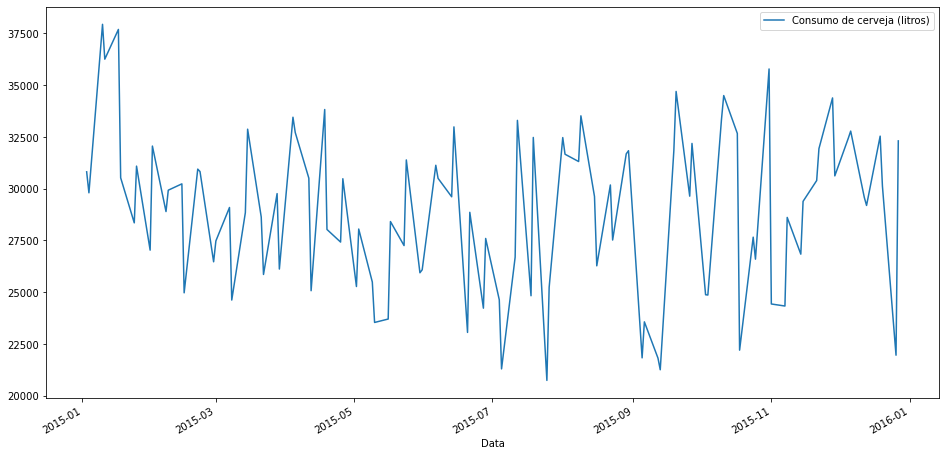

In [69]:
# plotar gráfico de linhas do consumo de cerveja ('Consumo de cerveja (litros)')
# somente aos finais de semana
filtro_fds = cerveja['Final de Semana'] == 1
cerveja[filtro_fds].plot(x='Data', 
             y='Consumo de cerveja (litros)',
             figsize=(16,8))

<AxesSubplot:xlabel='Data'>

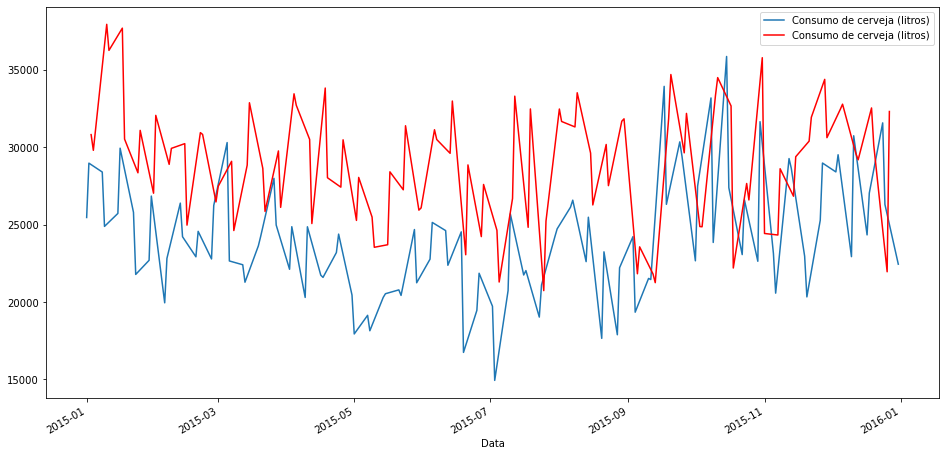

In [73]:
filtro = cerveja['Dia da Semana Num'].isin([3, 4])
ax1 = cerveja[filtro].plot(x='Data', 
             y='Consumo de cerveja (litros)',
             figsize=(16,8))

filtro = cerveja['Dia da Semana Num'].isin([5, 6])
cerveja[filtro].plot(x='Data', 
             y='Consumo de cerveja (litros)',
             figsize=(16,8), color='r', ax=ax1)

### Histograma

<AxesSubplot:>

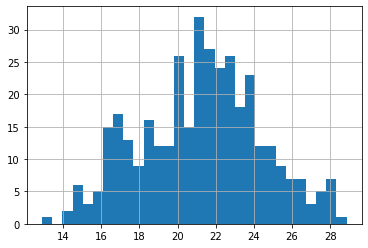

In [80]:
# plota o histograma 'Temperatura Media (C)'
cerveja['Temperatura Media (C)'].hist(bins=30)

### Boxplot

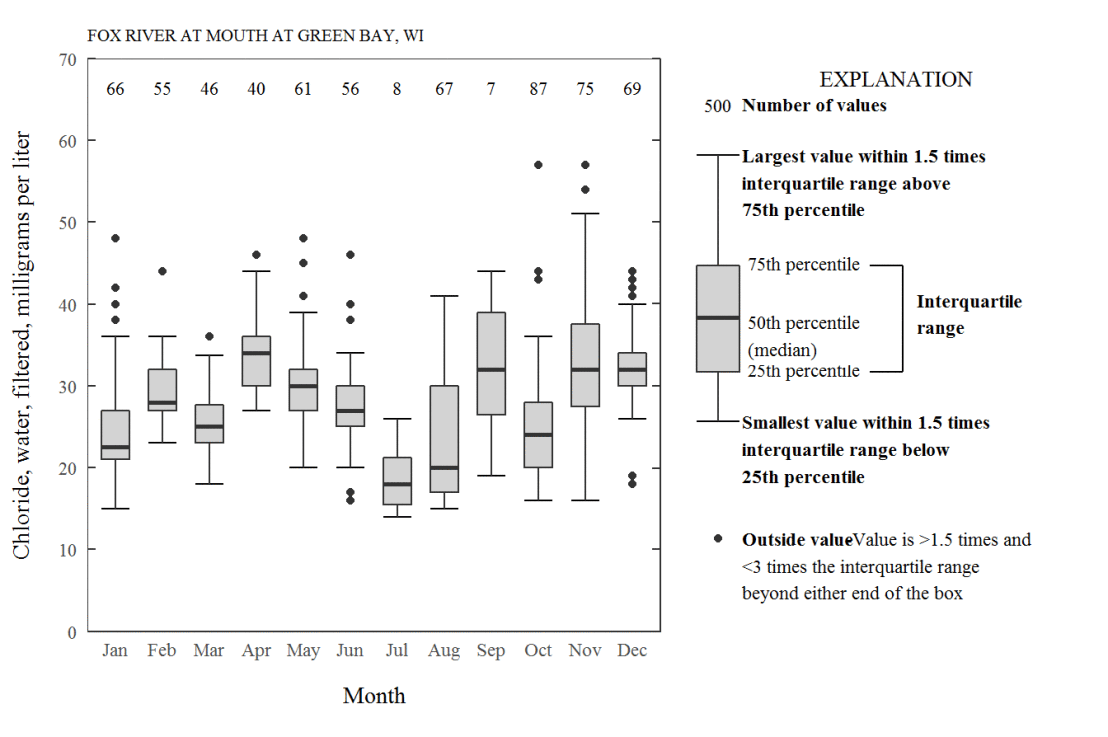

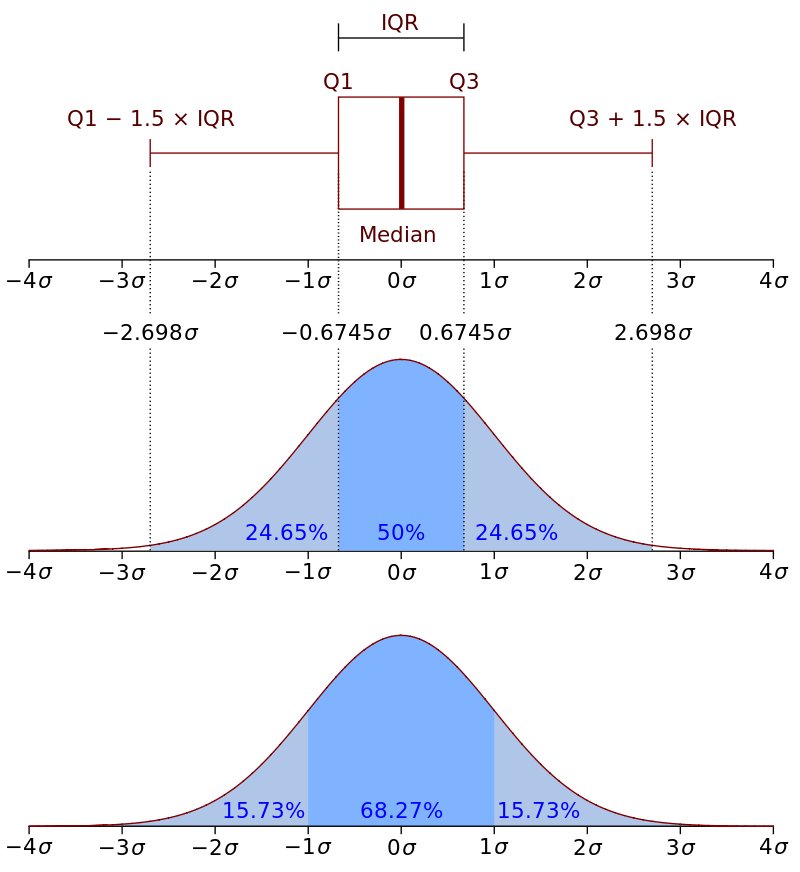

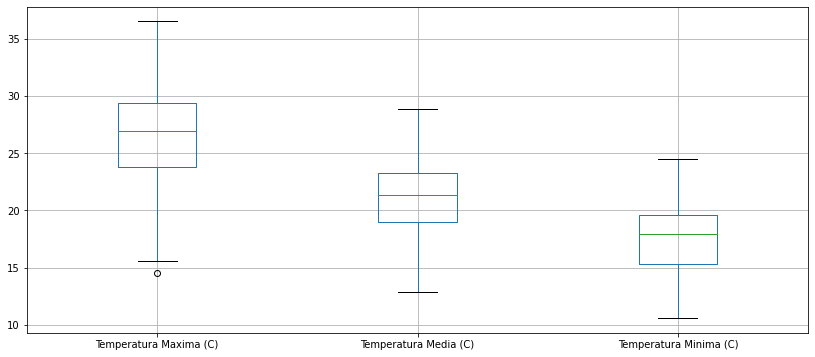

In [83]:
# plotar um boxplot das temperaturas:
# - máxima (Temperatura Maxima (C))
# - média (Temperatura Media (C))
# - mínim (Temperatura Minima (C))
cerveja.boxplot(column=['Temperatura Maxima (C)', 'Temperatura Media (C)', 'Temperatura Minima (C)'], figsize=(14, 6));

### Histograma e Boxplot

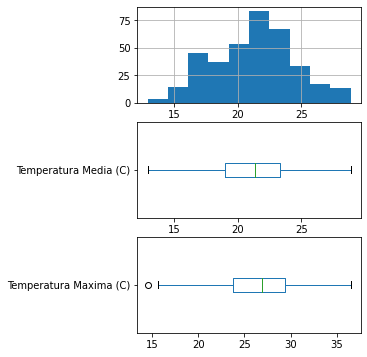

In [85]:
# plota histograma com boxplot embaixo
plt.figure(figsize=(4, 6))
plt.subplot(3,1,1)
cerveja['Temperatura Media (C)'].hist()
plt.subplot(3,1,2)
cerveja['Temperatura Media (C)'].plot.box(vert=False);
plt.subplot(3,1,3)
cerveja['Temperatura Maxima (C)'].plot.box(vert=False);

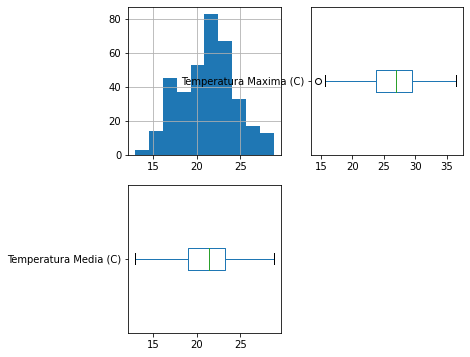

In [88]:
# plota histograma com boxplot embaixo
plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
cerveja['Temperatura Media (C)'].hist()
plt.subplot(2,2,3)
cerveja['Temperatura Media (C)'].plot.box(vert=False);
plt.subplot(2,2,2)
cerveja['Temperatura Maxima (C)'].plot.box(vert=False);

### Dispersão

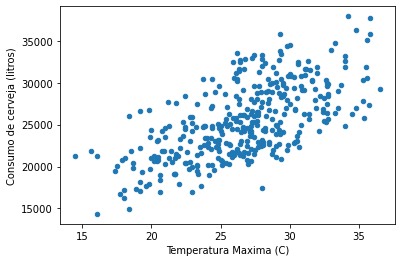

In [89]:
# plotar o gráfico de dispersão da 'Temperatura Maxima (C)' pelo 'Consumo de cerveja (litros)'
cerveja.plot.scatter(x='Temperatura Maxima (C)', y='Consumo de cerveja (litros)');

# Agrupamentos e agregações

**Agrupamento de dados**

Agrupar o dados é dividi-los em grupos baseado em algum critério, geralmente pelo valor de alguma(s) coluna(s).


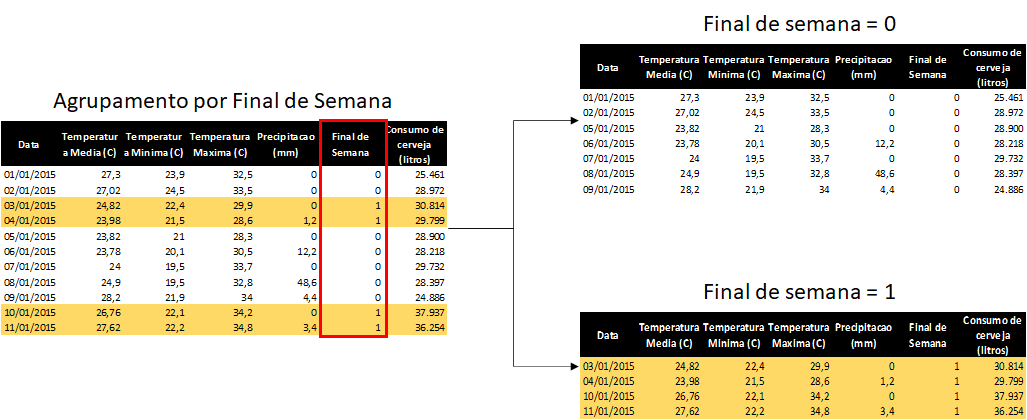

**Agregação de dados**

**Funções de agregação** são aquelas que recebem um vetor (por exemplo uma coluna) como parâmetro de entrada e retornam um valor escalar como saída.

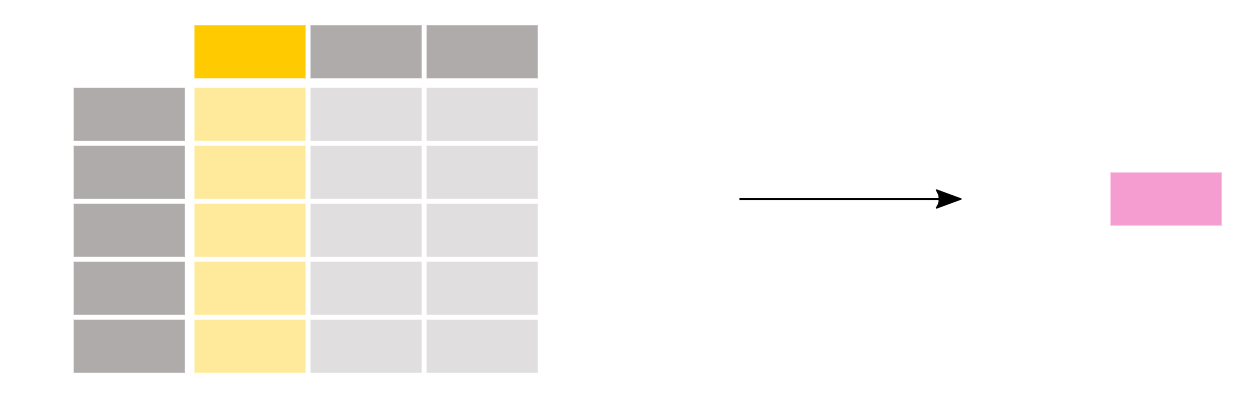


Algumas funções de agregação disponíveis no Pandas:

|função | descrição|
|-------|----------|
|sum| soma|
|mean| média|
|var| variância|
|std| desvio padrão|
|sem| erro padrão da média|
|size| quantidade de valores (inclui os nulos)|
|count| quantidade de valores (exclui os nulos)|
|first|primeiro valor|
|last|último valor|
|nth|"n" valor|
|min|menor valor|
|max|maior valor|
|idxmin|índice do menor valor|
|idxmax|índice do maior valor|
|quantile|quantil|

## Agrupar por mês e agregar consumo pela média

In [90]:
# agrupar por mês e calcular a média de 'Consumo de cerveja (litros)'
media_mensal = cerveja.groupby('Mes')['Consumo de cerveja (litros)'].mean()
media_mensal

Mes
1     28677.645161
2     25673.142857
3     25036.387097
4     24624.100000
5     22798.387097
6     23627.066667
7     22572.870968
8     25908.967742
9     25198.133333
10    27653.193548
11    25828.200000
12    27169.516129
Name: Consumo de cerveja (litros), dtype: float64

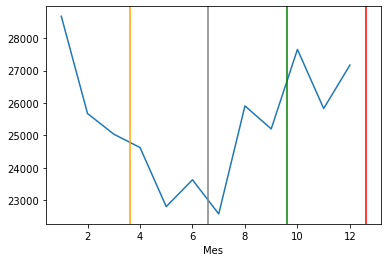

In [91]:
# plotar a média mensal
media_mensal.plot();
plt.axvline(3.6, color='orange')
plt.axvline(6.6, color='gray')
plt.axvline(9.6, color='g')
plt.axvline(12.6, color='r')

## Agrupar por mês e agregar consumo pelo valor máximo e pelo valor mínimo

In [92]:
# agrupar por mês
grupos = cerveja.groupby('Mes')['Consumo de cerveja (litros)'].agg(['max', 'min'])
grupos

,max,min
Mes,,
1,37937.0,21520.0
2,32057.0,17399.0
3,32872.0,20016.0
4,33822.0,19113.0
5,31387.0,16956.0
6,32983.0,16228.0
7,33298.0,14343.0
8,33517.0,17655.0
9,34695.0,16977.0


In [93]:
# observando o tipo do index do grupo
grupos.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Mes')

In [94]:
# observando o tipo de coluna do grupo
grupos.columns

Index(['max', 'min'], dtype='object')

## Agrupar consumo por mês e dia da semana e agregar consumo e temperatura máxima pela média e pelo desvio padrão

In [95]:
# agrupar por mês e dia da semana e calcular a média e o desvio padrão 
# do 'Consumo de cerveja (litros)' e da 'Temperatura Maxima (C)'
agregacao = {
    'Consumo de cerveja (litros)': ['mean', 'std'],
    'Temperatura Maxima (C)': ['mean', 'std'],
}
grupos = cerveja.groupby(['Mes', 'Dia da Semana Num']).agg(agregacao)
grupos.head(21)

Consumo de cerveja (litros)               \
                                             mean          std   
Mes Dia da Semana Num                                            
1   0                                    26357.00  3591.512124   
    1                                    30076.75  3582.316511   
    2                                    28322.50  3984.090570   
    3                                    25614.60  2020.401025   
    4                                    26485.00  3274.682427   
    5                                    32363.80  5157.686419   
    6                                    31916.25  2939.568038   
2   0                                    24798.50   842.487784   
    1                                    24287.50  6292.695527   
    2                                    24575.25  2291.770695   
    3                                    23011.25  2635.656449   
    4                                    24462.00  1405.678484   
    5                                    29133.50  1970.351830   
    6                                    29444.00  3109.224448   
3   0                                    23384.80  3750.854796   
    1                                    24001.00  1778.272617   
    2                                    22122.25  1330.105604   
    3                                    26081.50  3694.194409   
    4                                    23280.50  1646.005367   
    5                                    29081.25   489.826755   
    6                                    27387.40  3229.444890   

                      Temperatura Maxima (C)            
                                        mean       std  
Mes Dia da Semana Num                                   
1   0                                 32.225  4.327721  
    1                                 32.400  3.331666  
    2                                 32.125  2.036950  
    3                                 30.680  2.977751  
    4                                 30.640  3.818115  
    5                                 30.720  4.515197  
    6                                 32.250  3.469390  
2   0                                 28.975  2.434988  
    1                                 30.000  1.809236  
    2                                 27.450  3.016068  
    3                                 28.600  4.171331  
    4                                 29.275  3.091251  
    5                                 29.775  1.875056  
    6                                 28.975  1.466004  
3   0                                 26.220  3.006160  
    1                                 27.460  1.706751  
    2                                 27.650  2.645121  
    3                                 28.850  2.260531  
    4                                 28.525  1.730848  
    5                                 27.325  1.796988  
    6                                 25.380  1.729740

In [96]:
# observando o tipo do index do grupo
grupos.index

MultiIndex([( 1, 0),
            ( 1, 1),
            ( 1, 2),
            ( 1, 3),
            ( 1, 4),
            ( 1, 5),
            ( 1, 6),
            ( 2, 0),
            ( 2, 1),
            ( 2, 2),
            ( 2, 3),
            ( 2, 4),
            ( 2, 5),
            ( 2, 6),
            ( 3, 0),
            ( 3, 1),
            ( 3, 2),
            ( 3, 3),
            ( 3, 4),
            ( 3, 5),
            ( 3, 6),
            ( 4, 0),
            ( 4, 1),
            ( 4, 2),
            ( 4, 3),
            ( 4, 4),
            ( 4, 5),
            ( 4, 6),
            ( 5, 0),
            ( 5, 1),
            ( 5, 2),
            ( 5, 3),
            ( 5, 4),
            ( 5, 5),
            ( 5, 6),
            ( 6, 0),
            ( 6, 1),
            ( 6, 2),
            ( 6, 3),
            ( 6, 4),
            ( 6, 5),
            ( 6, 6),
            ( 7, 0),
            ( 7, 1),
            ( 7, 2),
            ( 7, 3),
            ( 7, 4),
            (

In [97]:
# observando o tipo de coluna do grupo
grupos.columns

MultiIndex([('Consumo de cerveja (litros)', 'mean'),
            ('Consumo de cerveja (litros)',  'std'),
            (     'Temperatura Maxima (C)', 'mean'),
            (     'Temperatura Maxima (C)',  'std')],
           )

In [101]:
grupos.reset_index()

Mes Dia da Semana Num Consumo de cerveja (litros)               \
                                                mean          std   
0    1                 0                    26357.00  3591.512124   
1    1                 1                    30076.75  3582.316511   
2    1                 2                    28322.50  3984.090570   
3    1                 3                    25614.60  2020.401025   
4    1                 4                    26485.00  3274.682427   
..  ..               ...                         ...          ...   
79  12                 2                    25121.00  4261.348437   
80  12                 3                    25938.60  3924.771751   
81  12                 4                    28400.75  2076.454892   
82  12                 5                    29130.25  4977.017271   
83  12                 6                    31100.50  1720.631764   

   Temperatura Maxima (C)            
                     mean       std  
0                  32.225  4.327721  
1                  32.400  3.331666  
2                  32.125  2.036950  
3                  30.680  2.977751  
4                  30.640  3.818115  
..                    ...       ...  
79                 27.380  3.905381  
80                 28.600  1.977372  
81                 30.975  1.857193  
82                 30.625  0.623832  
83                 29.050  1.369915  

[84 rows x 6 columns]

In [103]:
# mostrar o maior valor de consumo em cada mês em ordem descrescente
grupos['Consumo de cerveja (litros)'].max()

mean    32363.800000
std      6519.248135
dtype: float64

In [104]:
# mostrar a menor temperatura máxima em cada mês em ordem decrescente
grupos['Consumo de cerveja (litros)'].min()

mean    19659.400000
std       489.826755
dtype: float64

In [106]:
def q1(serie):
    return serie.quantile(.25)

agregacao = {
    'Consumo de cerveja (litros)': ['mean', 'std', q1],
    'Temperatura Maxima (C)': ['mean', 'std'],
}
grupos = cerveja.groupby('Mes').agg(agregacao)
grupos.head(21)

Consumo de cerveja (litros)                        Temperatura Maxima (C)  \
                           mean          std        q1                   mean   
Mes                                                                             
1                  28677.645161  4191.602061  25769.00              31.490323   
2                  25673.142857  3644.590052  23777.00              29.007143   
3                  25036.387097  3309.016245  22531.50              27.248387   
4                  24624.100000  4299.467307  21760.75              25.966667   
5                  22798.387097  3618.882817  20364.50              22.867742   
6                  23627.066667  4262.863640  21035.50              23.220000   
7                  22572.870968  4188.090295  20234.50              22.832258   
8                  25908.967742  4180.565540  23125.50              26.316129   
9                  25198.133333  5287.493042  21302.50              26.673333   
10                 27653.193548  4080.349490  24770.50              27.832258   
11                 25828.200000  3885.244291  22795.75              27.040000   
12                 27169.516129  3638.803630  24433.00              28.961290   

               
          std  
Mes            
1    3.329800  
2    2.507164  
3    2.274331  
4    2.692049  
5    2.473377  
6    3.344620  
7    3.758137  
8    3.205318  
9    6.163515  
10   4.635327  
11   3.325513  
12   2.820482

# Combinando DataFrames (Merge)

## Combina por intersecção 2 dataframes com mesmas linhas

|cidade|área (km²)|
|------|----|
|São Paulo|1.521,11|
|Rio de Janeiro|1.200,25|
|Belo Horizonte|331,40|

In [107]:
# criar dataframe cidade-área
cid_area = pd.DataFrame(
    {
        'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte'],
        'area_km2': [1521.11, 1200.25, 331.40],     
    })
cid_area

,cidade,area_km2
0,São Paulo,1521.11
1,Rio de Janeiro,1200.25
2,Belo Horizonte,331.40


|cidade|população|
|------|----|
|Belo Horizonte|2.501.576|
|Rio de Janeiro|6.718.903|
|São Paulo|12.252.023|



In [108]:
# criar dataframe cidade-população
cid_pop = pd.DataFrame(
    {
        'cidade': ['Belo Horizonte', 'Rio de Janeiro', 'São Paulo'],
        'populacao': [2_501_576, 6_718_903, 12_252_023],
    })
cid_pop

,cidade,populacao
0,Belo Horizonte,2501576
1,Rio de Janeiro,6718903
2,São Paulo,12252023


In [109]:
# junta os 2 dataframes usando a coluna 'cidade' como ponto de intersecção
cid_area.merge(cid_pop, on='cidade')

,cidade,area_km2,populacao
0,São Paulo,1521.11,12252023
1,Rio de Janeiro,1200.25,6718903
2,Belo Horizonte,331.40,2501576


## Combina 2 dataframes com linhas diferentes

|cidade|área (km²)|
|------|----|
|São Paulo|1.521,11|
|Rio de Janeiro|1.200,25|
|Belo Horizonte|331,40|

In [110]:
# cria dataframe cidade-área
cid_area = pd.DataFrame(
    {
        'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte'],
        'area_km2': [1521.11, 1200.25, 331.40],     
    })
cid_area

,cidade,area_km2
0,São Paulo,1521.11
1,Rio de Janeiro,1200.25
2,Belo Horizonte,331.40


|cidade|população|
|------|----|
|Fortaleza|2.643.247|
|Rio de Janeiro|6.718.903|
|São Paulo|12.252.023|

In [111]:
# cria dataframe cidade-população
cid_pop = pd.DataFrame(
    {
        'cidade': ['Fortaleza', 'Rio de Janeiro', 'São Paulo'],
        'populacao': [2_643_247, 6_718_903, 12_252_023],
    })
cid_pop

,cidade,populacao
0,Fortaleza,2643247
1,Rio de Janeiro,6718903
2,São Paulo,12252023


### Tipos de combinação

Combina por intersecção (inner join)

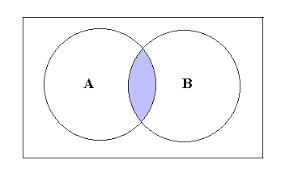

In [112]:
# merge inner: junta os 2 dataframes usando a coluna 'cidade' como ponto de intersecção
cid_area.merge(cid_pop, on='cidade')

,cidade,area_km2,populacao
0,São Paulo,1521.11,12252023
1,Rio de Janeiro,1200.25,6718903


Combina por união

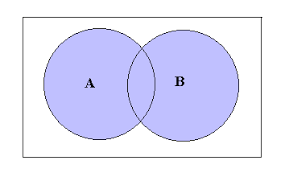

In [114]:
# combina por união (outer join): junta os 2 dataframes usando a coluna 'cidade' como ponto de intersecção
cid_area.merge(cid_pop, on='cidade', how='outer')

,cidade,area_km2,populacao
0,São Paulo,1521.11,12252023.0
1,Rio de Janeiro,1200.25,6718903.0
2,Belo Horizonte,331.40,NaN
3,Fortaleza,NaN,2643247.0


In [115]:
# parâmetro how=left: usa somente as chaves do primeiro dataframe 
cid_area.merge(cid_pop, on='cidade', how='left')

,cidade,area_km2,populacao
0,São Paulo,1521.11,12252023.0
1,Rio de Janeiro,1200.25,6718903.0
2,Belo Horizonte,331.40,NaN


In [116]:
# parâmetro how=right: usa somente as chaves do segundo dataframe 
cid_area.merge(cid_pop, on='cidade', how='right')

,cidade,area_km2,populacao
0,Fortaleza,NaN,2643247
1,Rio de Janeiro,1200.25,6718903
2,São Paulo,1521.11,12252023


In [119]:
# Adiciona uma nova coluna ao novo dafaframe com a densidade populacional de cada cidade
df = cid_area.merge(cid_pop, on='cidade', how='outer', validate='1:1')
df['dens pop'] = df['area_km2'] / df['populacao']
df

,cidade,area_km2,populacao,dens pop
0,São Paulo,1521.11,12252023.0,0.000124
1,Rio de Janeiro,1200.25,6718903.0,0.000179
2,Belo Horizonte,331.40,NaN,NaN
3,Fortaleza,NaN,2643247.0,NaN


In [120]:
cid_area['area_km2'] / cid_pop['populacao']

0    0.000575
1    0.000179
2    0.000027
dtype: float64

In [121]:
cid_area

,cidade,area_km2
0,São Paulo,1521.11
1,Rio de Janeiro,1200.25
2,Belo Horizonte,331.40


In [122]:
cid_pop

,cidade,populacao
0,Fortaleza,2643247
1,Rio de Janeiro,6718903
2,São Paulo,12252023
